In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyt

hartford_incidents = pd.read_csv('Downloads/Police_Incidents_Hartford.csv')

#### 5/6: Create a subset of my dataset to limit years to 2010- instead of 2005-

In [2]:
hartford_incidents.shape

(708985, 12)

In [3]:
hartford_incidents['Date'] = pd.to_datetime(hartford_incidents['Date'])
type(hartford_incidents['Date'])
hartford_2010_2021 = hartford_incidents[hartford_incidents['Date'].dt.year.between(2010,2021)]

In [4]:
hartford_2010_2021.head()

,Case_Number,Date,Time_24HR,Address,UCR_1_Category,UCR_1_Description,UCR_1_Code,UCR_2_Category,UCR_2_Description,UCR_2_Code,Neighborhood,geom
0,20003634,2020-01-30,108,159 WETHERSFIELD AV,19* - CRIMES AGAINST THE PUBLIC,BREACH-PEACE,1901,NaN,NaN,0,SOUTH GREEN,"(41.75136944416915, -72.67428040099338)"
1,20003652,2020-01-30,729,241 WETHERSFIELD AV,53* - LANDLORD-TENANT,LANDLORD - TENANT,5300,NaN,NaN,0,BARRY SQUARE,"(41.74920736635102, -72.67395898161627)"
2,20003743,2020-01-30,2220,942 MAIN ST,19* - CRIMES AGAINST THE PUBLIC,BREACH-PEACE,1901,19* - CRIMES AGAINST THE PUBLIC,DOMESTIC,1904,DOWNTOWN,"(41.76804715454631, -72.67283288514989)"
3,20003747,2020-01-30,2356,LAWRENCE ST & PARK ST,29* - FOUND PERSON/PROPERTY,ABANDONED M/V,2903,NaN,NaN,0,FROG HOLLOW,"(41.75807981134233, -72.68805597766179)"
4,20003653,2020-01-30,909,315 BUCKINGHAM ST,51* - MISC. MANAGEMENT INFO.,COMM TENSION;COMM-SERVICE,5104,19* - CRIMES AGAINST THE PUBLIC,DOMESTIC,1904,SOUTH GREEN,"(41.761474137196885, -72.68192253300306)"


make Time_24HR into string obj
last two digits = date[-2:]
first two digits = date[0:-2]

In [6]:
import pandas as pd
import datetime as dt
#Fixing the Time_24HR column to be a datetime object instead of current 3/4 digit presentation
for row in hartford_2010_2021['Time_24HR']:
    row = str(row)
    last2digits = row[-2:]
    firstdigits = row[0:-2]
    time = firstdigits + ":" + last2digits
    row = dt.datetime.strptime(time, "%H:%M")
    row =row.time()

ValueError: time data ':0' does not match format '%H:%M'

In [10]:
hartford_2010_2021.head()

,Case_Number,Date,Time_24HR,Address,UCR_1_Category,UCR_1_Description,UCR_1_Code,UCR_2_Category,UCR_2_Description,UCR_2_Code,Neighborhood,geom
0,20003634,2020-01-30,108,159 WETHERSFIELD AV,19* - CRIMES AGAINST THE PUBLIC,BREACH-PEACE,1901,NaN,NaN,0,SOUTH GREEN,"(41.75136944416915, -72.67428040099338)"
1,20003652,2020-01-30,729,241 WETHERSFIELD AV,53* - LANDLORD-TENANT,LANDLORD - TENANT,5300,NaN,NaN,0,BARRY SQUARE,"(41.74920736635102, -72.67395898161627)"
2,20003743,2020-01-30,2220,942 MAIN ST,19* - CRIMES AGAINST THE PUBLIC,BREACH-PEACE,1901,19* - CRIMES AGAINST THE PUBLIC,DOMESTIC,1904,DOWNTOWN,"(41.76804715454631, -72.67283288514989)"
3,20003747,2020-01-30,2356,LAWRENCE ST & PARK ST,29* - FOUND PERSON/PROPERTY,ABANDONED M/V,2903,NaN,NaN,0,FROG HOLLOW,"(41.75807981134233, -72.68805597766179)"
4,20003653,2020-01-30,909,315 BUCKINGHAM ST,51* - MISC. MANAGEMENT INFO.,COMM TENSION;COMM-SERVICE,5104,19* - CRIMES AGAINST THE PUBLIC,DOMESTIC,1904,SOUTH GREEN,"(41.761474137196885, -72.68192253300306)"


In [5]:
hartford_2010_2021['Neighborhood'].value_counts()

ASYLUM HILL            46519
NORTHEAST              45308
FROG HOLLOW            42296
DOWNTOWN               40794
BARRY SQUARE           40113
CLAY-ARSENAL           30567
SOUTHEND               28930
BEHIND THE ROCKS       27462
UPPER ALBANY           26424
SOUTH GREEN            21823
WESTEND                20702
PARKVILLE              18896
BLUE HILLS             18892
NORTH MEADOWS          12488
SHELDON-CHARTER OAK    11843
SOUTHWEST               9719
SOUTH MEADOWS           6076
Name: Neighborhood, dtype: int64

Asylum Hill has the most amount of crimes compared to the rest. 

In [6]:
hartford_2010_2021['Neighborhood'].describe()

count          448852
unique             17
top       ASYLUM HILL
freq            46519
Name: Neighborhood, dtype: object

<AxesSubplot:ylabel='Frequency'>

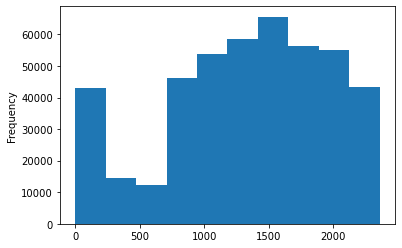

In [7]:
hartford_2010_2021['Time_24HR'].plot.hist()

#### Talk about frequency of times and crime rate along each time frame

In [12]:
#hartford_2010_2021['UCR_1_Category'].plot.barh()

In [9]:
groupedN = hartford_2010_2021.groupby('Neighborhood')


TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

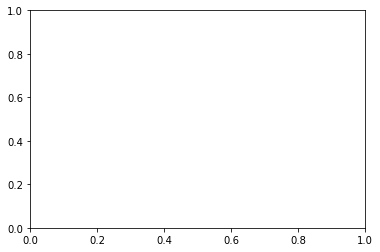

In [11]:
import matplotlib.pyplot as plt
plt.hist(groupedN)

<AxesSubplot:ylabel='UCR_1_Category'>

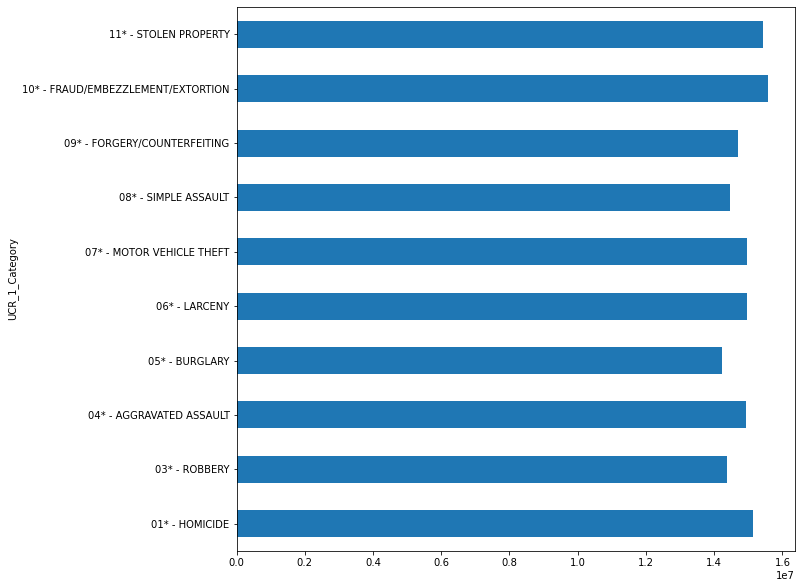

In [50]:
crime_type = hartford_2010_2021.groupby('UCR_1_Category').mean()
crime_type_pr = crime_type[:10]
crime_type_pr['Case_Number'].plot.barh(figsize=(10,10))

<AxesSubplot:ylabel='UCR_1_Description'>

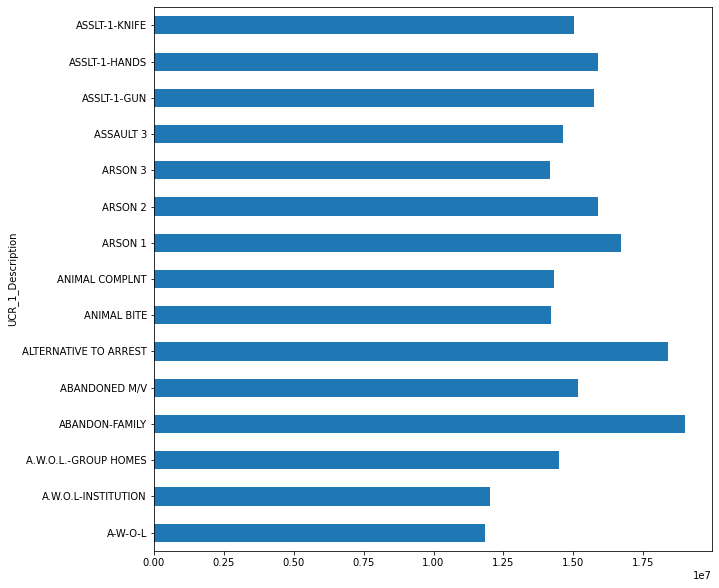

In [51]:
crime_des = hartford_2010_2021.groupby('UCR_1_Description').mean()
crime_des_pr = crime_des[:15]
crime_des_pr['Case_Number'].plot.barh(figsize=(10,10))

In [13]:
hartford_2011 = hartford_2010_2021[hartford_2010_2021['Date'].dt.year.between(2011,2011)]
hartford_2012 = hartford_2010_2021[hartford_2010_2021['Date'].dt.year.between(2012,2012)]

In [15]:
hartford_2011.head()
incidents_2011 = len(hartford_2011)
incidents_2012 = len(hartford_2012)

print("Reported incidents in 2011:", incidents_2011)
print("Reported incidents in 2012:", incidents_2012)

Reported incidents in 2011: 42890
Reported incidents in 2012: 42418


In [20]:
top_2011_n = hartford_2011['Neighborhood'].describe(include='top')
print(top_2011_n)

count           42890
unique             17
top       ASYLUM HILL
freq             4700
Name: Neighborhood, dtype: object


In [21]:
top_2012_n = hartford_2012['Neighborhood'].describe(include='top')
print(top_2012_n)

count           42418
unique             17
top       ASYLUM HILL
freq             4867
Name: Neighborhood, dtype: object


<AxesSubplot:ylabel='UCR_1_Description'>

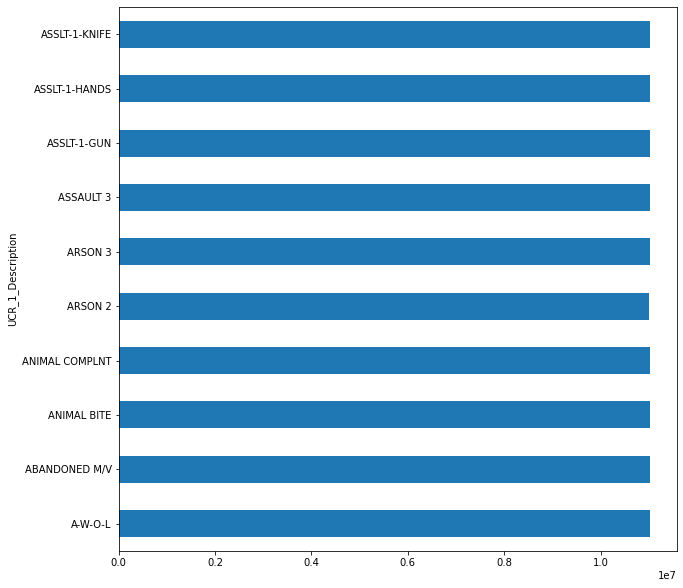

In [44]:
crime_2011 = hartford_2011.groupby('UCR_1_Description').mean()[:10]
#print(sorted_crime_2012[:1)
crime_2011['Case_Number'].plot.barh(figsize=(10,10))

<AxesSubplot:ylabel='UCR_1_Description'>

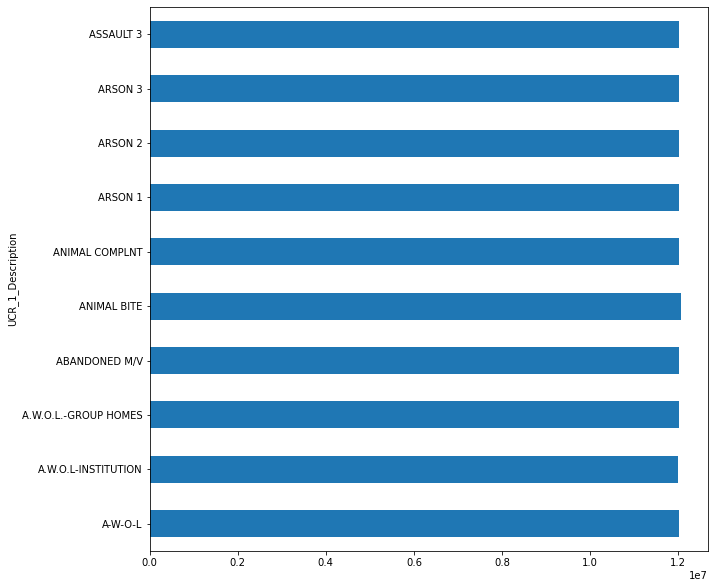

In [45]:
crime_2012 = hartford_2012.groupby('UCR_1_Description').mean()[:10]
#print(sorted_crime_2012[:1)
crime_2012['Case_Number'].plot.barh(figsize=(10,10))

In [ ]:
crime_2011_bymonth = crime_2011.groupby('Date')